In [ ]:
import os
from glob import glob
from PIL import Image
import torch
import torchvision.transforms as transforms

IMAGE_SIZE = 64
root_dir   = "C:/Users/hucu/Desktop/DeepLearningProject3/dataset/CatDataset/cats/Data"
exts       = ("jpg", "png", "jpeg")

transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3),
])

paths = []
for e in exts:
    paths += glob(os.path.join(root_dir, f"*.{e}"))

print(f"Found {len(paths)} images in {root_dir}")

images = []
for p in paths:
    img = Image.open(p).convert("RGB")
    images.append(transform(img))

images = torch.stack(images)
print(f"Loaded images tensor with shape {images.shape}")


Found 29843 images in C:/Users/hucu/Desktop/DeepLearningProject3/dataset/CatDataset/cats/Data
Loaded images tensor with shape torch.Size([29843, 3, 64, 64])


In [ ]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),
            nn.ReLU(True),
            nn.Conv2d(32, 64, 4, 2, 1),
            nn.ReLU(True),
            nn.Conv2d(64, 128, 4, 2, 1),
            nn.ReLU(True),
            nn.Conv2d(128, 256, 4, 2, 1),
            nn.ReLU(True),
        )
        self.fc_mu     = nn.Linear(256*4*4, latent_dim)
        self.fc_logvar = nn.Linear(256*4*4, latent_dim)

    def forward(self, x):
        x = self.conv(x).view(x.size(0), -1)
        return self.fc_mu(x), self.fc_logvar(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.fc = nn.Linear(latent_dim, 256*4*4)
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),
            nn.Tanh(),
        )

    def forward(self, z):
        x = self.fc(z).view(z.size(0), 256, 4, 4)
        return self.deconv(x)

class VAE(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mu, logvar):
        std = (0.5 * logvar).exp()
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decoder(z)
        return recon, mu, logvar


device     = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim = 256
model      = VAE(latent_dim).to(device)

from torch.optim import Adam
from torch.amp import GradScaler
optimizer = Adam(model.parameters(), lr=1e-3)
scaler    = GradScaler('cuda')


Epoch 1/50: 100%|██████████| 59/59 [00:01<00:00, 37.51it/s, loss=2.7e+3] 


Epoch 1 complete. Avg Loss: 2734.3156


Epoch 2/50: 100%|██████████| 59/59 [00:01<00:00, 43.68it/s, loss=1.35e+3]


Epoch 2 complete. Avg Loss: 1368.7208


Epoch 3/50: 100%|██████████| 59/59 [00:01<00:00, 44.06it/s, loss=1.06e+3]


Epoch 3 complete. Avg Loss: 1072.9244


Epoch 4/50: 100%|██████████| 59/59 [00:01<00:00, 43.53it/s, loss=865]


Epoch 4 complete. Avg Loss: 875.2282


Epoch 5/50: 100%|██████████| 59/59 [00:01<00:00, 42.67it/s, loss=780]


Epoch 5 complete. Avg Loss: 789.3727


Epoch 6/50: 100%|██████████| 59/59 [00:01<00:00, 43.58it/s, loss=731]


Epoch 6 complete. Avg Loss: 739.5101


Epoch 7/50: 100%|██████████| 59/59 [00:01<00:00, 43.04it/s, loss=683]


Epoch 7 complete. Avg Loss: 691.5120


Epoch 8/50: 100%|██████████| 59/59 [00:01<00:00, 42.47it/s, loss=659]


Epoch 8 complete. Avg Loss: 666.5817


Epoch 9/50: 100%|██████████| 59/59 [00:01<00:00, 45.60it/s, loss=638]


Epoch 9 complete. Avg Loss: 645.8808


Epoch 10/50: 100%|██████████| 59/59 [00:01<00:00, 43.58it/s, loss=626]


Epoch 10 complete. Avg Loss: 633.3257


Epoch 11/50: 100%|██████████| 59/59 [00:01<00:00, 44.32it/s, loss=606]


Epoch 11 complete. Avg Loss: 613.0743


Epoch 12/50: 100%|██████████| 59/59 [00:01<00:00, 41.51it/s, loss=593]


Epoch 12 complete. Avg Loss: 600.2472


Epoch 13/50: 100%|██████████| 59/59 [00:01<00:00, 44.74it/s, loss=587]


Epoch 13 complete. Avg Loss: 594.2726


Epoch 14/50: 100%|██████████| 59/59 [00:01<00:00, 45.21it/s, loss=574]


Epoch 14 complete. Avg Loss: 581.2462


Epoch 15/50: 100%|██████████| 59/59 [00:01<00:00, 45.37it/s, loss=566]


Epoch 15 complete. Avg Loss: 573.2880


Epoch 16/50: 100%|██████████| 59/59 [00:01<00:00, 44.73it/s, loss=563]


Epoch 16 complete. Avg Loss: 570.2459


Epoch 17/50: 100%|██████████| 59/59 [00:01<00:00, 45.43it/s, loss=553]


Epoch 17 complete. Avg Loss: 559.6843


Epoch 18/50: 100%|██████████| 59/59 [00:01<00:00, 44.99it/s, loss=552]


Epoch 18 complete. Avg Loss: 558.6065


Epoch 19/50: 100%|██████████| 59/59 [00:01<00:00, 46.52it/s, loss=542]


Epoch 19 complete. Avg Loss: 549.1171


Epoch 20/50: 100%|██████████| 59/59 [00:01<00:00, 48.69it/s, loss=544]


Epoch 20 complete. Avg Loss: 550.4624


Epoch 21/50: 100%|██████████| 59/59 [00:01<00:00, 48.32it/s, loss=536]


Epoch 21 complete. Avg Loss: 542.9014


Epoch 22/50: 100%|██████████| 59/59 [00:01<00:00, 47.81it/s, loss=532]


Epoch 22 complete. Avg Loss: 538.9188


Epoch 23/50: 100%|██████████| 59/59 [00:01<00:00, 45.72it/s, loss=529]


Epoch 23 complete. Avg Loss: 535.7186


Epoch 24/50: 100%|██████████| 59/59 [00:01<00:00, 43.11it/s, loss=531]


Epoch 24 complete. Avg Loss: 537.3750


Epoch 25/50: 100%|██████████| 59/59 [00:01<00:00, 43.53it/s, loss=522]


Epoch 25 complete. Avg Loss: 528.7192


Epoch 26/50: 100%|██████████| 59/59 [00:01<00:00, 43.49it/s, loss=520]


Epoch 26 complete. Avg Loss: 526.7933


Epoch 27/50: 100%|██████████| 59/59 [00:01<00:00, 43.28it/s, loss=519]


Epoch 27 complete. Avg Loss: 525.0943


Epoch 28/50: 100%|██████████| 59/59 [00:01<00:00, 43.02it/s, loss=517]


Epoch 28 complete. Avg Loss: 522.8502


Epoch 29/50: 100%|██████████| 59/59 [00:01<00:00, 43.09it/s, loss=513]


Epoch 29 complete. Avg Loss: 519.1113


Epoch 30/50: 100%|██████████| 59/59 [00:01<00:00, 43.56it/s, loss=512]


Epoch 30 complete. Avg Loss: 518.5233


Epoch 31/50: 100%|██████████| 59/59 [00:01<00:00, 43.67it/s, loss=510]


Epoch 31 complete. Avg Loss: 516.4923


Epoch 32/50: 100%|██████████| 59/59 [00:01<00:00, 43.50it/s, loss=508]


Epoch 32 complete. Avg Loss: 514.2101


Epoch 33/50: 100%|██████████| 59/59 [00:01<00:00, 44.15it/s, loss=506]


Epoch 33 complete. Avg Loss: 512.5111


Epoch 34/50: 100%|██████████| 59/59 [00:01<00:00, 43.58it/s, loss=505]


Epoch 34 complete. Avg Loss: 510.7581


Epoch 35/50: 100%|██████████| 59/59 [00:01<00:00, 43.43it/s, loss=503]


Epoch 35 complete. Avg Loss: 509.0483


Epoch 36/50: 100%|██████████| 59/59 [00:01<00:00, 43.38it/s, loss=500]


Epoch 36 complete. Avg Loss: 506.5321


Epoch 37/50: 100%|██████████| 59/59 [00:01<00:00, 43.66it/s, loss=499]


Epoch 37 complete. Avg Loss: 505.2394


Epoch 38/50: 100%|██████████| 59/59 [00:01<00:00, 42.56it/s, loss=497]


Epoch 38 complete. Avg Loss: 503.1079


Epoch 39/50: 100%|██████████| 59/59 [00:01<00:00, 42.18it/s, loss=497]


Epoch 39 complete. Avg Loss: 503.1875


Epoch 40/50: 100%|██████████| 59/59 [00:01<00:00, 43.23it/s, loss=494]


Epoch 40 complete. Avg Loss: 500.1890


Epoch 41/50: 100%|██████████| 59/59 [00:01<00:00, 43.72it/s, loss=495]


Epoch 41 complete. Avg Loss: 501.0994


Epoch 42/50: 100%|██████████| 59/59 [00:01<00:00, 43.14it/s, loss=492]


Epoch 42 complete. Avg Loss: 497.9355


Epoch 43/50: 100%|██████████| 59/59 [00:01<00:00, 43.81it/s, loss=490]


Epoch 43 complete. Avg Loss: 496.0342


Epoch 44/50: 100%|██████████| 59/59 [00:01<00:00, 43.34it/s, loss=496]


Epoch 44 complete. Avg Loss: 502.5054


Epoch 45/50: 100%|██████████| 59/59 [00:01<00:00, 43.49it/s, loss=484]


Epoch 45 complete. Avg Loss: 490.0687


Epoch 46/50: 100%|██████████| 59/59 [00:01<00:00, 43.21it/s, loss=485]


Epoch 46 complete. Avg Loss: 491.3442


Epoch 47/50: 100%|██████████| 59/59 [00:01<00:00, 43.42it/s, loss=482]


Epoch 47 complete. Avg Loss: 487.9171


Epoch 48/50: 100%|██████████| 59/59 [00:01<00:00, 43.60it/s, loss=481]


Epoch 48 complete. Avg Loss: 486.7259


Epoch 49/50: 100%|██████████| 59/59 [00:01<00:00, 42.43it/s, loss=483]


Epoch 49 complete. Avg Loss: 488.9013


Epoch 50/50: 100%|██████████| 59/59 [00:01<00:00, 43.18it/s, loss=483]


Epoch 50 complete. Avg Loss: 489.0280


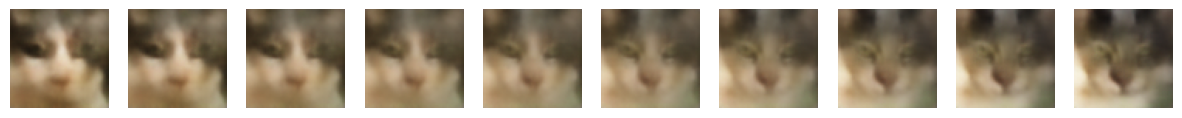

In [ ]:
import torch.nn.functional as F
from torchvision.utils import save_image
from tqdm import tqdm
import os
import datetime

EPOCHS      = 50
BATCH_SIZE  = 512
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
run_dir = f"./samples_vae_run_{timestamp}"
os.makedirs(run_dir, exist_ok=True)

N = images.size(0)

for epoch in range(1, EPOCHS+1):
    model.train()
    perm = torch.randperm(N)
    running_loss = 0.0

    loop = tqdm(range(0, N, BATCH_SIZE), desc=f"Epoch {epoch}/{EPOCHS}")
    for i in loop:
        batch_idx = perm[i : i + BATCH_SIZE]
        batch = images[batch_idx].to(device, non_blocking=True)

        optimizer.zero_grad()
        with torch.amp.autocast('cuda'):
            recon, mu, logvar = model(batch)
            recon_loss = F.mse_loss(recon, batch, reduction="sum")
            kl_loss    = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            loss       = (recon_loss + kl_loss) / batch.size(0)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item() * batch.size(0)
        loop.set_postfix(loss=(running_loss / ((i + BATCH_SIZE))))

    # Save generated samples at end of epoch
    model.eval()
    with torch.no_grad():
        z = torch.randn(16, latent_dim, device=device)
        samples = model.decoder(z).mul(0.5).add(0.5)
        save_image(samples, f"{run_dir}/epoch_{epoch:02d}.png", nrow=4)

    print(f"Epoch {epoch} complete. Avg Loss: {running_loss/N:.4f}")


import numpy as np
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    z0 = torch.randn(1, latent_dim, device=device)
    z1 = torch.randn(1, latent_dim, device=device)
    interpolations = [(1 - alpha) * z0 + alpha * z1 for alpha in np.linspace(0, 1, 10)]
    imgs = torch.cat([model.decoder(z) for z in interpolations], dim=0).mul(0.5).add(0.5)

fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for ax, img in zip(axes, imgs.cpu()):
    ax.imshow(img.permute(1, 2, 0))
    ax.axis("off")
plt.show()